### Повторение

#### Задача 1. 

Напишите функцию scramble: функция принимает на вход две строчки и должна проверить, чтобы из букв первой строки можно было составить вторую строку. Например, если у нас s1 = 'javascript', а s2 = 'java', то функция должна вернуть True. То же самое касательно варианта s1 = 'абырвалг' и s2 = 'главрыба', то есть, 1) вторая строка не обязательно содержит все буквы из первой, но если во второй строке две буквы "с", а в первой только одна, то должно быть False 2) буквы могут быть в любом порядке. 

In [2]:
def scramble(str1, str2):
    l_str1 = list(str1)
    for i in str2:
        if i in l_str1:
            l_str1.remove(i)
        else:
            return False
    else:
        return True



In [4]:
scramble('javascript', 'cava')
        

True

#### Задача 2. 

Правильные скобки. На вход подается строка, которая содержит только и исключительно скобки трех видов: круглые, квадратные и фигурные. Например, '{[([({})])]}'. Ваша задача - написать функцию, которая бы проверяла правильность последовательности скобок и возвращала True или False. Примеры правильных и неправильных строк:

    '[(])' = False
    ')[](' = False
    '{[()]}' = True

In [3]:
def func(string):
    stack = []
    is_right = True
    for c in string:
        if stack == [] and c in ')]}':
            is_right = False
            break
        if c in '([{':
               stack.append(c)
        elif c in ')]}':
            if c == ')' and stack.pop() == '(':
                continue
            if c == ']' and stack.pop() == '[':
                continue
            if c == '}' and stack.pop() == '{':
                continue
            is_right = False
            break
    return is_right

In [7]:
str = ')[]('

func(str)

False

#### Задача 3.

Напишите программу, которая считывает содержимое (любого) текстового файла, разбивает его содержимое на слова, приводит их к леммам и составляет частотный словарь. Постройте график для десяти самых частотных слов с помощью библиотеки matplotlib.

In [33]:
# from nltk import word_tokenize
# import pymorphy2
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import spacy_udpipe
spacy_udpipe.download('ru')

Already downloaded a model for the 'ru' language


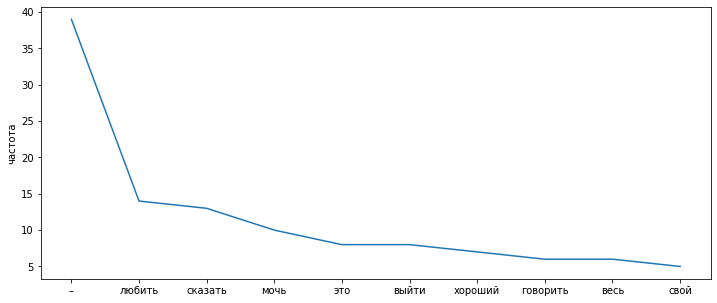

In [50]:
text = open('01.txt', 'r', encoding='utf-8').read()

nlp = spacy_udpipe.load('ru')
doc = nlp(text)
punctuation = ['.', ',', '!', '?', ':', '(', ')', '…', '-', ';', '»', '«', '–']

lemmas = [token.lemma_ for token in doc]
for item in lemmas:                   # удаляет не всю пунктуацию, не понимаю почему
    if item in punctuation:
        lemmas.remove(item)
        
sw = stopwords.words("russian")
dic = {a: lemmas.count(a) for a in lemmas if a not in sw}
sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))

fig = plt.figure(figsize=(12, 5))
ax3 = plt.subplot()
x = list(sorted_dic.keys())
y = list(sorted_dic.values())
x = x[:10]
y = y[:10]
ax3.set_ylabel('частота')

ax3.plot(x, y)
plt.show()

#### Задача 4. 

Постройте деревья зависимостей (любым известным вам способом) для любых трех выбранных вами предложений. Парсер тоже можно использовать любой, какой помните.

In [1]:
import spacy
from spacy import displacy
nlp = spacy.load('ru_core_news_sm')
doc = nlp('Мама мыла раму.')
doc2 = nlp('Погода сегодня кошмарная, но завтра будет хуже')
doc3 = nlp('Я забыла купить покушать')
options = {"bg": "ocean",
           "color": "black", "font": "Source Sans Pro"}
displacy.render(doc, style='dep', options=options)
displacy.render(doc2, style='dep', options=options)
displacy.render(doc3, style='dep', options=options)

#### Задача 5. 

Возьмите любой текстовый файл и попробуйте поискать в нем редупликации вида "X-то X". Нас устроит все, похожее на "дурак-то он дурак", "красивая-то красивая": между словами с повтором может что-то быть, как в первом примере, а может ничего не быть. Подумайте сами, насколько далеко могут отстоять друг от друга повторяющиеся слова. 

In [3]:
import re

In [28]:
text = 'Он сделал большую глупость. Однако, дурак-то он дурак, но сделал это ради своей семьи. Семья-то семья, а как же остальные?'
pattern = re.compile(r'(?i)((\w+)-то.*\2)')  #Как я поняла, нельзя делать ссылки на группы без захвата содержимого, 
                                             # так что как избавиться от второго элемента в картеже я не поняла
lst = re.findall(pattern, text)
rezult = [i[0] for i in lst]
print(rezult)

['дурак-то он дурак', 'Семья-то семья']


#### Задача 6. 

А теперь очень похожий квест, но с глаголами: ищем конструкции вида "сделать я сделал", "пойти он пошел". Очевидно, что здесь пригодится какая-нибудь лемматизация. 

In [17]:
import spacy_udpipe
spacy_udpipe.download('ru')

Already downloaded a model for the 'ru' language


In [25]:
text = '''Он сделал большую глупость. Однако, дурак-то он дурак, но сделал это ради своей семьи. Сделать он сделал, только это уже ничего не изменит. 
          Вот если бы он туда пошел. Хотя, пойти он пошел, его всё равно не пустили.'''
nlp = spacy_udpipe.load('ru')
doc = nlp(text)
rezult = []
for i in range(0, len(doc) - 2):
    if doc[i].lemma_ == doc[i + 2].lemma_:
        t = ' '.join([str(doc[i]), str(doc[i + 1]), str(doc[i + 2])])
        #t = str(doc[i]) + ' ' + str(doc[i + 1]) + ' ' + str(doc[i + 2])
        rezult.append(t)

In [26]:
rezult

['Сделать он сделал', 'пойти он пошел']

In [20]:
type(doc[3])

spacy.tokens.token.Token